#  Deep learning 

# Assignment 5

# Lath Essoh

# 1_Pytorch_basics

In [74]:
import sys
sys.path.append("..") 

In [70]:
!pip uninstall -y torch torchvision torchaudio

In [72]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu
  Using cached https://download.pytorch.org/whl/cpu/torch-2.2.2-cp311-none-macosx_10_9_x86_64.whl (151.0 MB)
  Using cached https://download.pytorch.org/whl/cpu/torchvision-0.17.2-cp311-cp311-macosx_10_13_x86_64.whl (1.7 MB)
  Using cached https://download.pytorch.org/whl/cpu/torchaudio-2.2.2-cp311-cp311-macosx_10_13_x86_64.whl (3.4 MB)


In [6]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.autograd import Variable

#%% *** Tensors ***

In [96]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Téléchargement du jeu de données Boston housing
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Convertir les données en tensors PyTorch
data_tensor = torch.from_numpy(data).float()
target_tensor = torch.from_numpy(target).float()

print("Dimensions des données :", data_tensor.size())
print("Dimensions de la cible :", target_tensor.size())

# Exemple d'accès aux données
print("Exemples de données :", data_tensor[:2])
print("Exemples de cible :", target_tensor[:10])

#-- Exemples d'autres types de tensors
#-- Scalars (0-D tensors)
x = torch.rand(1)
print("Exemple de scalaire :", x)

#-- Vectors (1-D tensors)
temp = torch.FloatTensor([23, 24, 24.5, 26, 27.2, 23.0])
print("Exemple de vecteur (températures) :", temp)
print("Taille du vecteur :", temp.size())

#-- Matrix (2-D tensor)
abc = torch.Tensor([[2, 4, 6, 8],
                    [-2, -4, -6, -10]])
print("Exemple de matrice :", abc)
print("Nombre d'éléments dans la matrice :", abc.numel())
print("Élément dans la première ligne et troisième colonne :", abc[0][2])  
print("Troisième colonne de la matrice :", abc[:, 2])

Dimensions des données : torch.Size([506, 13])
Dimensions de la cible : torch.Size([506])
Exemples de données : tensor([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01, 6.5750e+00,
         6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02, 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01, 6.4210e+00,
         7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02, 1.7800e+01, 3.9690e+02,
         9.1400e+00]])
Exemples de cible : tensor([24.0000, 21.6000, 34.7000, 33.4000, 36.2000, 28.7000, 22.9000, 27.1000,
        16.5000, 18.9000])
Exemple de scalaire : tensor([0.0975])
Exemple de vecteur (températures) : tensor([23.0000, 24.0000, 24.5000, 26.0000, 27.2000, 23.0000])
Taille du vecteur : torch.Size([6])
Exemple de matrice : tensor([[  2.,   4.,   6.,   8.],
        [ -2.,  -4.,  -6., -10.]])
Nombre d'éléments dans la matrice : 8
Élément dans la première ligne et troisième colonne : tensor(6.)
Troisième colonne de la m

In [103]:
#-- 3-D tensors (e.g. data-like images: numbers in a matrix, which are stacked together)
from PIL import Image
ste_lore = np.array(Image.open('ville-futur-enjeux.jpg').resize((224,224)))

In [105]:
# Image shape is 224,224,3: the first index represents height, the second represents width, and the third a channel (RGB)

ste_lore_tensor = torch.from_numpy(ste_lore)
ste_lore_tensor.size()

torch.Size([224, 224, 3])

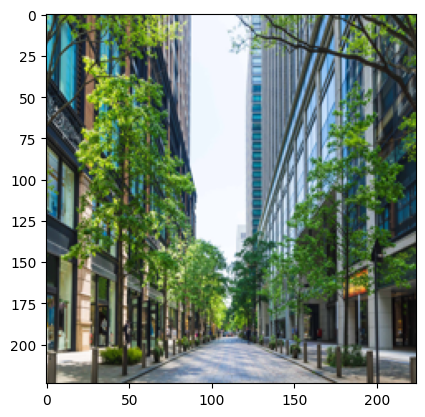

In [107]:
plt.imshow(ste_lore_tensor)

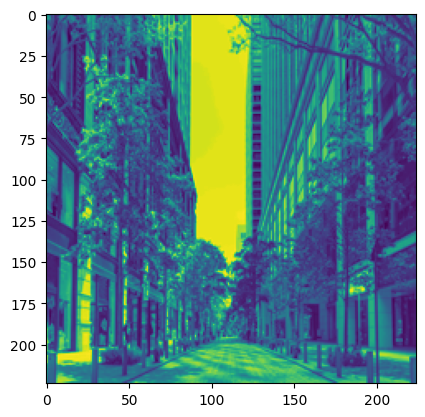

In [109]:
# A couple of common operations: slicing and cropping
plt.imshow(ste_lore_tensor[:,:,0].numpy())  # 0 here represents the 1st channel of RGB [more on this later for DS2E]

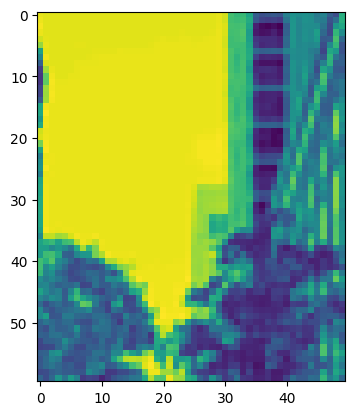

In [111]:
plt.imshow(ste_lore_tensor[100:160,90:140,0].numpy())

#---- PLAY ALONE ----

#---- Create an arbitrary 3-D tensor of size 2x2x4

In [122]:
# Créer un tensor 3D de taille 2x2x4 avec des valeurs aléatoires
tensor_3d = torch.rand(2, 2, 4)

# Afficher la taille du tensor et ses valeurs
print("Taille du tensor:", tensor_3d.size())
print("Tensor 3D:\n", tensor_3d)

Taille du tensor: torch.Size([2, 2, 4])
Tensor 3D:
 tensor([[[0.9004, 0.9391, 0.3710, 0.7052],
         [0.7648, 0.1442, 0.6202, 0.0906]],

        [[0.0143, 0.2352, 0.3897, 0.4440],
         [0.2021, 0.6918, 0.7553, 0.8562]]])


#%% *** Basic operations with tensors  ***

In [ ]:

# We can add and multiply tensors
a = torch.rand(2,2) 
b = torch.rand(2,2)

a + b
torch.add(a,b)

a*b
a.mul(b)

# CPU vs. GPU [CUDA cores might not be available on your laptop]
a = torch.rand(10000,10000)
b = torch.rand(10000,10000)
a.matmul(b)

a = a.cuda()
b = b.cuda()
a.matmul(b)

(array([ 94., 100., 108.,  83., 120.,  98.,  95.,  86.,  98., 118.]),
 array([0.00199783, 0.10170247, 0.20140712, 0.30111176, 0.40081641,
        0.50052106, 0.60022569, 0.69993037, 0.79963499, 0.89933968,
        0.9990443 ]),
 <BarContainer object of 10 artists>)

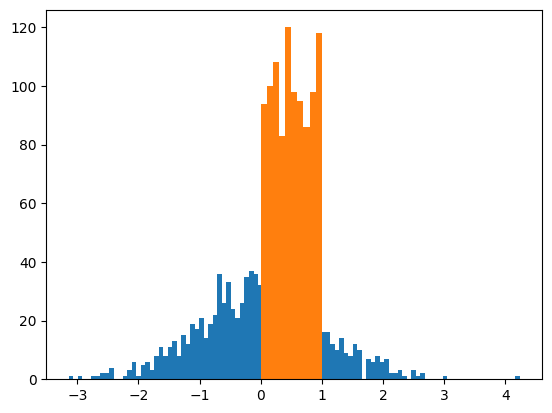

In [11]:
# Plotting as usual
plt.hist(torch.randn(1000).numpy(), 100)
plt.hist(torch.rand(1000).numpy(), 10)

#%% *** Variables ***

A variable form a thin wrapper around a tensor object, its gradients, and a reference to the function that created it
See Variable class components
The gradient refer to the rate of the change of the loss function with respect to various parameters (W,b)

In [19]:
x = Variable(torch.ones(2,2), requires_grad=True)
y = x.mean()

'backward' operation on the variable computes the gradients (by defaults, the gradients are none)
After computing the backward pass, a gradient w.r.t. this tensor is accumulated into .grad attribute

In [24]:
y.backward()
x.grad

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])

In [27]:
# 'grad_fn' returns the function that created the variable
x.grad_fn  # None if the variable is created by the user 
y.grad_fn

In [30]:
# 'data' accesses the tensor associated with the variable
x.data

tensor([[1., 1.],
        [1., 1.]])

#%% *** Layers ***

In [34]:
from torch.nn import Linear, ReLU
import torch.nn as nn

#-- Linear layer
# It accepts a tensor of size 10 and outputs a tensor of size 5
myFirstLayer = Linear(in_features=10, out_features=5, bias=True)

# Apply the transformation to an input tensor
input = Variable(torch.randn(1,10))
myFirstLayer(input) 
    
# Access the trainable parameters
myFirstLayer.weight
myFirstLayer.bias
    
# We can stack layers by passing the output of one layer to another layer
myFirstLayer1 = Linear(10,5)
myFirstLayer2 = Linear(5,2)
myFirstLayer2(myFirstLayer1(input))

#-- ReLU non-linear activation
input = Variable(torch.Tensor([[1,2,-1,-5, 0]])) 
myFirstRelu = ReLU()
myFirstRelu(input)

tensor([[1., 2., 0., 0., 0.]])

#---- PLAY ALONE ----

In [38]:
import torch
from torch.autograd import Variable
from torch.nn import Linear, Tanh

#-- Création des couches
# Couche linéaire qui accepte un tensor de taille 20 et produit un tensor de taille 5
layer1 = Linear(in_features=20, out_features=5)

# Couche d'activation non-linéaire Tanh
activation = Tanh()

# Couche linéaire qui accepte un tensor de taille 5 et produit un tensor de taille 2
layer2 = Linear(in_features=5, out_features=2)

#-- Création d'un tensor d'entrée aléatoire de taille 1x20 pour passer à travers les couches
input_tensor = Variable(torch.randn(1, 20))

#-- Propagation du tensor à travers les couches
output = layer1(input_tensor)  # Passage par la première couche linéaire
output = activation(output)    # Passage par la fonction d'activation tanh
output = layer2(output)        # Passage par la deuxième couche linéaire

#-- Affichage de la taille et de la sortie finale
print("Taille de la sortie finale:", output.size())
print("Sortie finale:\n", output)

Taille de la sortie finale: torch.Size([1, 2])
Sortie finale:
 tensor([[-0.3449, -0.8543]], grad_fn=<AddmmBackward0>)


#%% *** Loss functions ***

In [42]:
#-- Mean Square Error loss for regression problems
loss = nn.MSELoss()

# Apply the loss to tensors
input = Variable(torch.randn(3, 10), requires_grad=True) 
target = Variable(torch.randn(3, 10))
input.size()
output = loss(input, target)
output.backward()

#-- Cross-entropy loss for classification problems

In [46]:
loss = nn.CrossEntropyLoss()

# Apply the loss to tensors
input = Variable(torch.randn(3, 5), requires_grad=True) 
target = Variable(torch.LongTensor(3).random_(5)) 
output = loss(input, target)
output.backward()

#---- PLAY ALONE ----

In [51]:
import torch
from torch import nn
from torch.autograd import Variable

# Vérifiez si un GPU est disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Appareil utilisé : {device}")

#--- Fonction de perte MSE pour les problèmes de régression
loss = nn.MSELoss()

# Application de la perte aux tensors
input = Variable(torch.randn(3, 10, device=device), requires_grad=True) 
target = Variable(torch.randn(3, 10, device=device))
output = loss(input, target)
output.backward()

print("MSE Loss calculée sur le GPU :", output)

#--- Fonction de perte Cross-Entropy pour les problèmes de classification
loss = nn.CrossEntropyLoss()

# Application de la perte aux tensors
input = Variable(torch.randn(3, 5, device=device), requires_grad=True) 
target = Variable(torch.LongTensor(3).random_(5).to(device))
output = loss(input, target)
output.backward()

print("Cross-Entropy Loss calculée sur le GPU :", output)

Appareil utilisé : cpu
MSE Loss calculée sur le GPU : tensor(1.5384, grad_fn=<MseLossBackward0>)
Cross-Entropy Loss calculée sur le GPU : tensor(3.2802, grad_fn=<NllLossBackward0>)


#%% *** Optimizers ***

In [55]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

# Définition d'un modèle simple (réseau linéaire pour l'exemple)
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(10, 1)  # une couche linéaire

    def forward(self, x):
        return self.fc(x)
# Initialisation du modèle
model = SimpleModel()

# Création d'une fonction de perte, par exemple la MSE pour un problème de régression
loss_fn = nn.MSELoss()

# Création de l'optimiseur avec les paramètres du modèle et un taux d'apprentissage
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Création d'un dataset d'exemple
# Ici, nous générons des données aléatoires pour l'exemple
dataset = [(Variable(torch.randn(10)), Variable(torch.randn(1))) for _ in range(100)]

# Boucle d'entraînement simple
for input, target in dataset:
    optimizer.zero_grad()              # Réinitialisation du gradient
    output = model(input)              # Passage avant dans le modèle
    loss = loss_fn(output, target)     # Calcul de la perte
    loss.backward()                    # Calcul des gradients
    optimizer.step()                   # Mise à jour des paramètres

print("Entraînement terminé.")

Entraînement terminé.


# 2_Spiral_exo

In [67]:
import sys
sys.path.append("..") 

In [69]:
import random
import torch
from torch import nn, optim
import numpy as np
import math
from IPython import display
import matplotlib.pyplot as plt 

In [72]:
from torch.utils.tensorboard import SummaryWriter
import torchvision
from torchvision import datasets, transforms
from torch.utils.tensorboard import SummaryWriter

In [77]:
# Tensorboard to visuale the architecture of the NN, performance, training and test, etc. (create an empty plot)
writer = SummaryWriter()

Make sure to upload 'res' from here: https://github.com/Atcold/pytorch-Deep-Learning/tree/master/res

In [97]:
# Make sure to upload 'res' from here: https://github.com/Atcold/pytorch-Deep-Learning/tree/master/res
#from res.plot_lib import plot_data, plot_model, set_default


from matplotlib import pyplot as plt
import numpy as np
import torch
from IPython.display import HTML, display


def set_default(figsize=(10, 10), dpi=100):
    plt.style.use(['dark_background', 'bmh'])
    plt.rc('axes', facecolor='k')
    plt.rc('figure', facecolor='k')
    plt.rc('figure', figsize=figsize, dpi=dpi)


def plot_data(X, y, d=0, auto=False, zoom=1):
    X = X.cpu()
    y = y.cpu()
    plt.scatter(X.numpy()[:, 0], X.numpy()[:, 1], c=y, s=20, cmap=plt.cm.Spectral)
    plt.axis('square')
    plt.axis(np.array((-1.1, 1.1, -1.1, 1.1)) * zoom)
    if auto is True: plt.axis('equal')
    plt.axis('off')

    _m, _c = 0, '.15'
    plt.axvline(0, ymin=_m, color=_c, lw=1, zorder=0)
    plt.axhline(0, xmin=_m, color=_c, lw=1, zorder=0)


def plot_model(X, y, model):
    model.cpu()
    mesh = np.arange(-1.1, 1.1, 0.01)
    xx, yy = np.meshgrid(mesh, mesh)
    with torch.no_grad():
        data = torch.from_numpy(np.vstack((xx.reshape(-1), yy.reshape(-1))).T).float()
        Z = model(data).detach()
    Z = np.argmax(Z, axis=1).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plot_data(X, y)
    
set_default()

In [100]:
# Set the device GPU or CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#%% *** Data ***

Shapes:
X: (4000, 2)
y: (4000,)


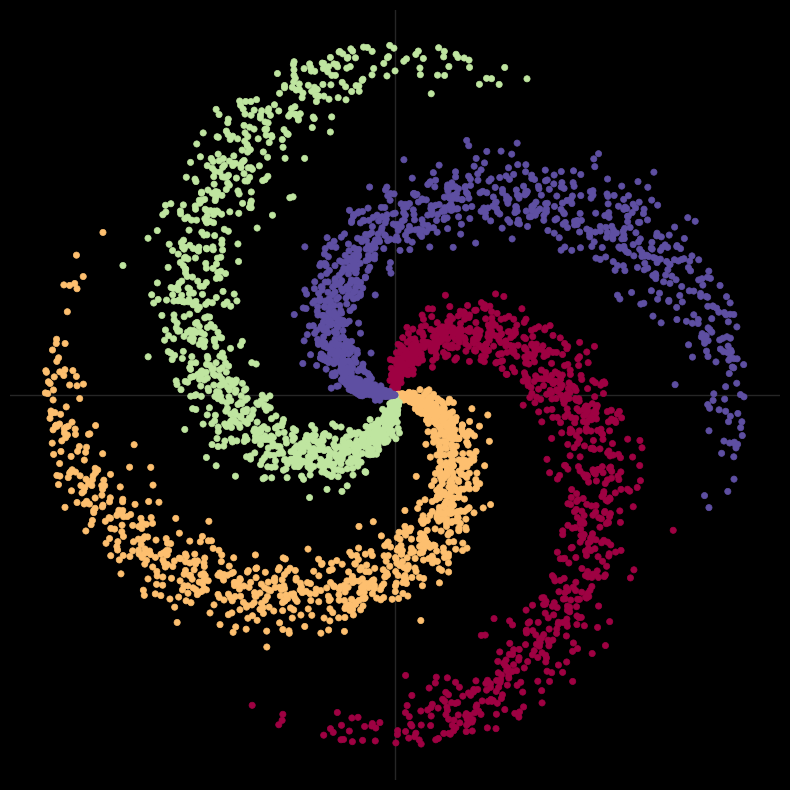

In [106]:


#-- Let's create our spiral [parameters below can be changed]
seed = 12345
random.seed(seed)
torch.manual_seed(seed)
N = 1000  # observations per class 
D = 2     # number of features
C = 4     # number of classes 
H = 100   # number of hidden units


# Note: no need to understand the code below
X = torch.zeros(N * C, D).to(device)
y = torch.zeros(N * C, dtype=torch.long).to(device)
for c in range(C):
    index = 0
    t = torch.linspace(0, 1, N)
    inner_var = torch.linspace(
        (2 * math.pi / C) * (c),
        (2 * math.pi / C) * (2 + c),
        N
    ) + torch.randn(N) * 0.2
    
    for ix in range(N * c, N * (c + 1)):
        X[ix] = t[index] * torch.FloatTensor((
            math.sin(inner_var[index]), math.cos(inner_var[index])
        ))
        y[ix] = c
        index += 1

print("Shapes:")
print("X:", tuple(X.size()))
print("y:", tuple(y.size()))

plot_data(X, y)

#%% *** NN with linear transformations ***

In [112]:
# Set learning rate and L2 penalty
learning_rate = 1e-3
lambda_l2 = 1e-5

# Build the architecture with linear layers
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Linear(H, C)
)

In [114]:
#Convert to CUDA (if available)
model.to(device) 


Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=4, bias=True)
)

In [124]:
# Define the loss function
criterion = torch.nn.CrossEntropyLoss()

In [134]:
# Optimizer: SGD
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)

Finished Training
0.weight 200
0.bias 100
2.weight 10000
2.bias 100
4.weight 10000
4.bias 100
6.weight 400
6.bias 4
('0.weight', Parameter containing:
tensor([[-0.3874,  0.7068],
        [ 0.0152, -0.3899],
        [-0.4410,  0.0523],
        [ 0.2694, -0.0286],
        [ 0.1409,  0.4332],
        [ 0.1084, -0.1588],
        [-0.4772,  0.5340],
        [-0.4302,  0.3877],
        [ 0.6524,  0.6163],
        [-0.1309, -0.1559],
        [ 0.3965,  0.3517],
        [-0.4458,  0.0374],
        [ 0.3724,  0.5226],
        [-0.1714, -0.0489],
        [ 0.0165,  0.2987],
        [ 0.1250, -0.6368],
        [-0.1711,  0.3703],
        [-0.5437,  0.1871],
        [-0.6067, -0.3931],
        [-0.3482, -0.6160],
        [ 0.5026,  0.3818],
        [ 0.2088,  0.3169],
        [ 0.3186, -0.1792],
        [ 0.6938, -0.3054],
        [ 0.2663,  0.5682],
        [-0.6377,  0.6667],
        [-0.0603,  0.2247],
        [ 0.0799,  0.1371],
        [-0.3550,  0.0789],
        [ 0.3591,  0.3865],
        [

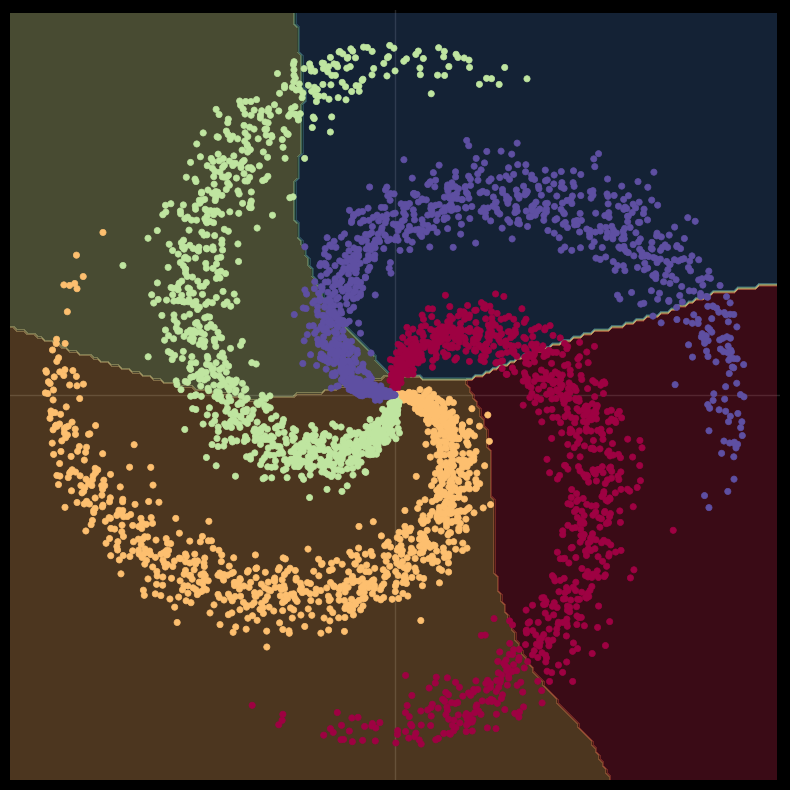

In [160]:
# Training (1000 epochs: loop over the dataset multiple times)
for t in range(1000):
    
    # Feed forward to get the logits
    y_pred = model(X)
    
    # Compute the loss and accuracy
    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float() / len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    
    # plot loss train [tensorboard]
    writer.add_scalar('Loss/Train Linear Transf.', loss, t)

    # plot accuracy train [tensorboard]
    writer.add_scalar('Accuracy/Train Linear Transf.', acc, t)

    # Set to zero the gradients before running the backward pass
    optimizer.zero_grad()
    
    # Backward pass to compute the gradient of loss w.r.t learnable parameters 
    loss.backward()
    
    # Update parameters
    optimizer.step()

# Plot architecture model [tensorboard]
writer.add_graph(model.to(device), X[:64].to(device)) 

print('Finished Training')

# See parameters
for name, v in model.named_parameters():
    print(name, v.numel())

for parameters in model.named_parameters():
    print(parameters)

# Plot trained model
plot_model(X, y, model)

#####################
#---- PLAY ALONE ----

Test Accuracy: 0.444


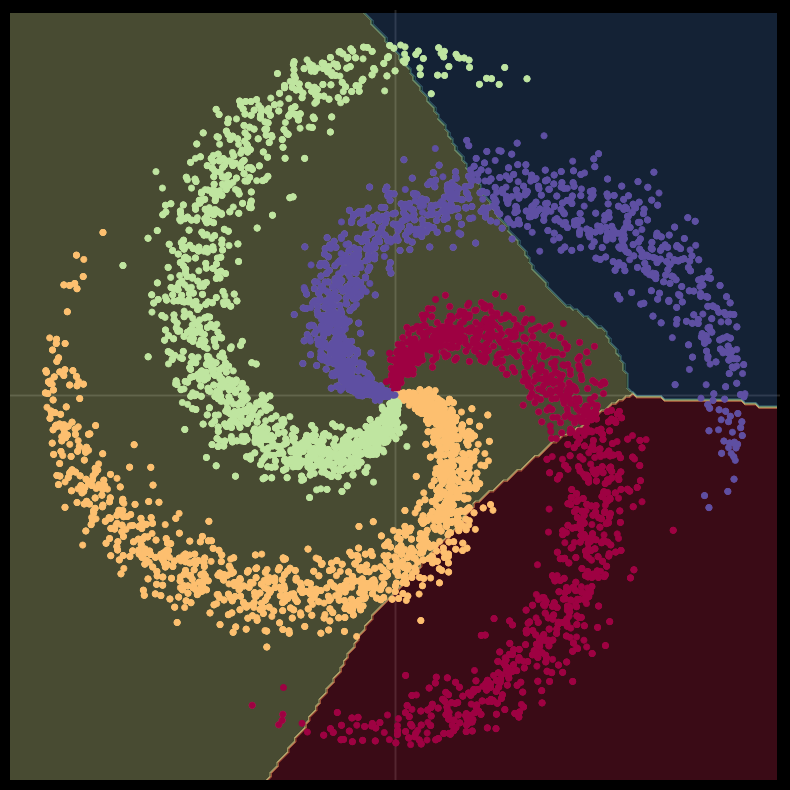

In [173]:
#---- PLAY ALONE ----

# Import necessary libraries
import torch
from torch import nn, optim
import math
from IPython import display
import random
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter

# Initialize TensorBoard
writer = SummaryWriter()

# Set device (GPU or CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Set the random seed for reproducibility
seed = 12345
random.seed(seed)
torch.manual_seed(seed)

# Parameters for the spiral dataset
N = 1000  # observations per class 
D = 2     # number of features
C = 4     # number of classes 
H = 100   # number of hidden units
test_N = 200  # number of test observations per class

# Generate the spiral dataset (Training data)
X = torch.zeros(N * C, D).to(device)
y = torch.zeros(N * C, dtype=torch.long).to(device)

for c in range(C):
    index = 0
    t = torch.linspace(0, 1, N)
    inner_var = torch.linspace(
        (2 * math.pi / C) * (c),
        (2 * math.pi / C) * (2 + c),
        N
    ) + torch.randn(N) * 0.2
    
    for ix in range(N * c, N * (c + 1)):
        X[ix] = t[index] * torch.FloatTensor((
            math.sin(inner_var[index]), math.cos(inner_var[index])
        ))
        y[ix] = c
        index += 1

# Generate the spiral dataset (Test data)
X_test = torch.zeros(test_N * C, D).to(device)
y_test = torch.zeros(test_N * C, dtype=torch.long).to(device)

for c in range(C):
    index = 0
    t = torch.linspace(0, 1, test_N)
    inner_var = torch.linspace(
        (2 * math.pi / C) * (c),
        (2 * math.pi / C) * (2 + c),
        test_N
    ) + torch.randn(test_N) * 0.2
    
    for ix in range(test_N * c, test_N * (c + 1)):
        X_test[ix] = t[index] * torch.FloatTensor((
            math.sin(inner_var[index]), math.cos(inner_var[index])
        ))
        y_test[ix] = c
        index += 1

# Plot the data
def plot_data(X, y, d=0, auto=False, zoom=1):
    X = X.cpu()
    y = y.cpu()
    plt.scatter(X.numpy()[:, 0], X.numpy()[:, 1], c=y, s=20, cmap=plt.cm.Spectral)
    plt.axis('square')
    plt.axis(np.array((-1.1, 1.1, -1.1, 1.1)) * zoom)
    if auto: 
        plt.axis('equal')
    plt.axis('off')
    plt.axvline(0, color='.15', lw=1, zorder=0)
    plt.axhline(0, color='.15', lw=1, zorder=0)

plot_data(X, y)

# Neural Network with multiple hidden layers
learning_rate = 1e-3
lambda_l2 = 1e-5

# Build the model with several hidden layers
model = nn.Sequential(
    nn.Linear(D, H),    # Input to first hidden layer
    nn.ReLU(),          # Activation function
    nn.Linear(H, H),    # Hidden layer 1 to 2
    nn.ReLU(),          # Activation function
    nn.Linear(H, H),    # Hidden layer 2 to 3
    nn.ReLU(),          # Activation function
    nn.Linear(H, C)     # Output layer
)

# Move model to device (GPU or CPU)
model.to(device)

# Define loss function (CrossEntropyLoss)
criterion = nn.CrossEntropyLoss()

# Define the optimizer (Stochastic Gradient Descent with L2 regularization)
optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)

# Training loop (1000 epochs)
for t in range(1000):
    
    # Feed forward to get predictions
    y_pred = model(X)
    
    # Compute the loss and accuracy
    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float() / len(y)
    
    # Output the current epoch's loss and accuracy
    print(f"[EPOCH]: {t}, [LOSS]: {loss.item():.6f}, [ACCURACY]: {acc:.3f}")
    display.clear_output(wait=True)
    
    # Log loss and accuracy to TensorBoard
    writer.add_scalar('Loss/Train', loss, t)
    writer.add_scalar('Accuracy/Train', acc, t)
    
    # Zero the gradients before the backward pass
    optimizer.zero_grad()
    
    # Backward pass to compute gradients
    loss.backward()
    
    # Update model parameters
    optimizer.step()

# Plot the trained model
def plot_model(X, y, model):
    model.cpu()
    mesh = np.arange(-1.1, 1.1, 0.01)
    xx, yy = np.meshgrid(mesh, mesh)
    with torch.no_grad():
        data = torch.from_numpy(np.vstack((xx.reshape(-1), yy.reshape(-1))).T).float()
        Z = model(data).detach()
    Z = np.argmax(Z, axis=1).reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plot_data(X, y)

# Plot the model after training
plot_model(X, y, model)

# Save the trained model and optimizer states (optional)
torch.save(model.state_dict(), "model.pth")
torch.save(optimizer.state_dict(), "optimizer.pth")

# Evaluate the model on the test data
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)
    score_test, predicted_test = torch.max(y_pred_test, 1)
    
    # Calculate accuracy on the test set
    test_acc = (y_test == predicted_test).sum().float() / len(y_test)
    print(f"Test Accuracy: {test_acc:.3f}")

# Plot test data with predictions
plot_data(X_test, y_test)


#%% *** Two-layered NN with non-linear transformations ***

Finished Training


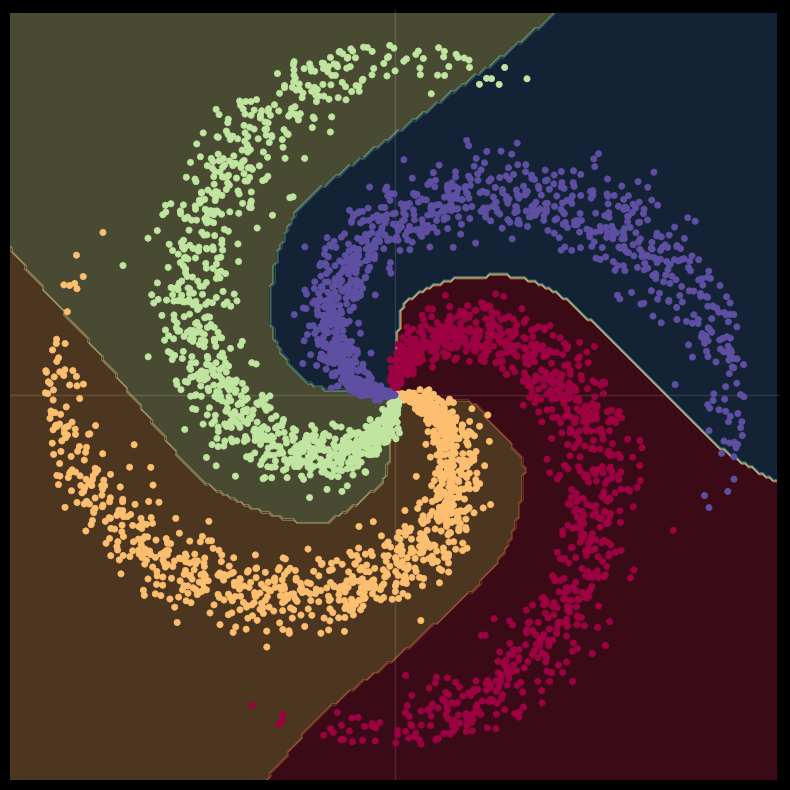

In [177]:

learning_rate = 1e-3
lambda_l2 = 1e-5

# Architecture
model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, C)
)

model.to(device)

# Loss
criterion = torch.nn.CrossEntropyLoss()

# Optimizer (here ADAM)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) 

# Training
for t in range(1000):
    
    y_pred = model(X)

    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float() / len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    
    # plot loss train
    writer.add_scalar('Loss/Train 1 ReLU', loss, t)

    # plot accuracy train
    writer.add_scalar('Accuracy/Train 1 ReLU', acc, t)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

#plot architecture model
writer.add_graph(model.to(device), X[:64].to(device))

# Close the tensorboard
writer.close()
    
print('Finished Training')

# Plot trained model
plot_model(X, y, model)



#####################
#---- PLAY ALONE ----

######## What happen if you add an additonal hidden layer with ReLU activation?

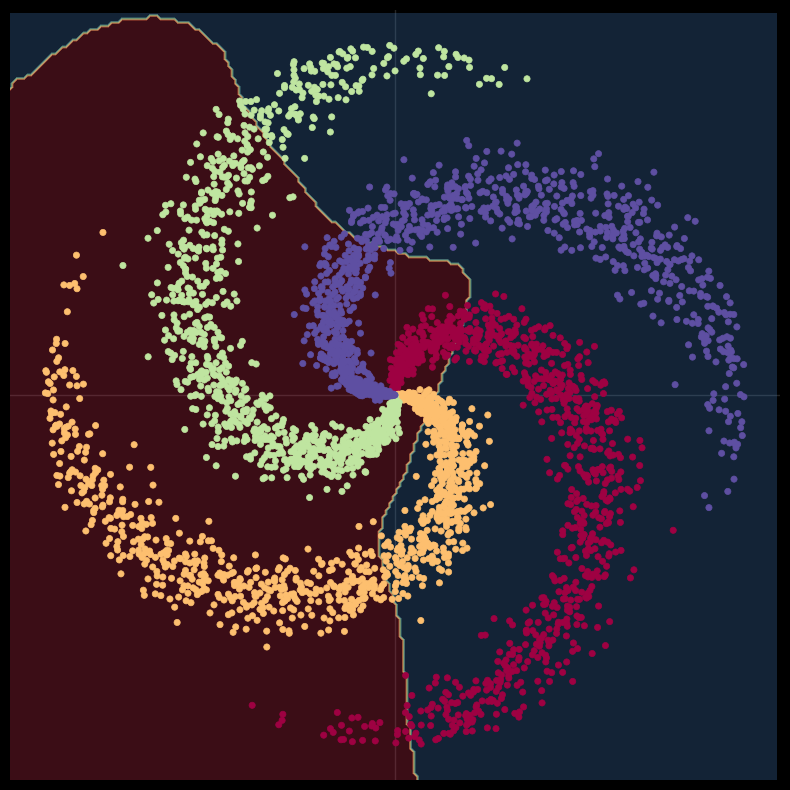

In [183]:
# Architecture with an additional hidden layer with ReLU
model_revised = nn.Sequential(
    nn.Linear(D, H),  # Input layer to first hidden layer
    nn.ReLU(),        # ReLU activation
    nn.Linear(H, H),  # First hidden layer to second hidden layer
    nn.ReLU(),        # ReLU activation
    nn.Linear(H, C)   # Second hidden layer to output layer
)

model_revised.to(device)

# Training with the revised architecture
for t in range(1000):
    y_pred = model_revised(X)

    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float() / len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    
    # plot loss train
    writer.add_scalar('Loss/Train with additional ReLU layer', loss, t)

    # plot accuracy train
    writer.add_scalar('Accuracy/Train with additional ReLU layer', acc, t)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plot trained model with the revised architecture
plot_model(X, y, model_revised)

# Save the trained model
torch.save(model_revised.state_dict(), "model_revised.pth")

####### What is you use tanh as activation?

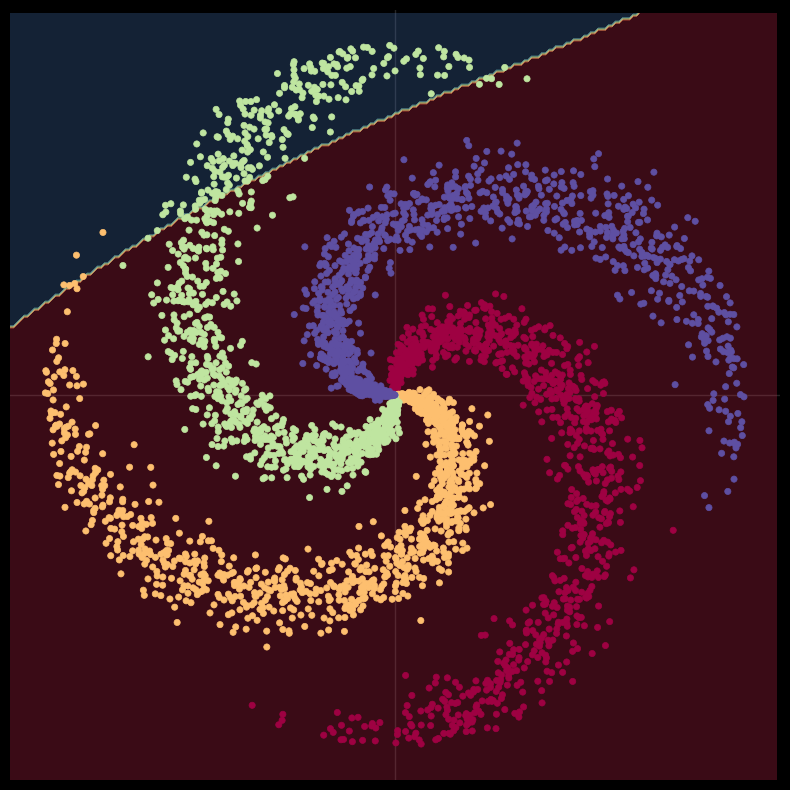

In [187]:
# Architecture with Tanh activation instead of ReLU
model_tanh = nn.Sequential(
    nn.Linear(D, H),  # Input layer to first hidden layer
    nn.Tanh(),         # Tanh activation
    nn.Linear(H, H),  # First hidden layer to second hidden layer
    nn.Tanh(),         # Tanh activation
    nn.Linear(H, C)   # Second hidden layer to output layer
)

model_tanh.to(device)

# Training with Tanh activation
for t in range(1000):
    y_pred = model_tanh(X)

    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)
    acc = (y == predicted).sum().float() / len(y)
    print("[EPOCH]: %i, [LOSS]: %.6f, [ACCURACY]: %.3f" % (t, loss.item(), acc))
    display.clear_output(wait=True)
    
    # plot loss train
    writer.add_scalar('Loss/Train with Tanh activation', loss, t)

    # plot accuracy train
    writer.add_scalar('Accuracy/Train with Tanh activation', acc, t)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plot trained model with Tanh activation
plot_model(X, y, model_tanh)

# Save the trained model with Tanh
torch.save(model_tanh.state_dict(), "model_tanh.pth")

Key Differences:

ReLU Activation: It tends to provide better performance for deeper networks as it doesn't suffer from the vanishing gradient problem as much as tanh does.

Tanh Activation: This activation can lead to faster convergence in some cases because it outputs values between -1 and 1, which could center the data better for learning. However, it suffers from vanishing gradients, especially when the data gets pushed into extreme values of the activation function.


# 3_NN_on_CIFAR10

In [5]:
import sys
sys.path.append("..") 

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

#%% *** Setting ***

In [9]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device: %s'%device)

Using device: cpu


In [11]:
# Initialize randomly the weights 
def weights_init(m):
    if type(m) == nn.Linear:
        m.weight.data.normal_(0.0, 1e-3)
        m.bias.data.fill_(0.)

# Update learning rates (first set, then optimized)
def update_lr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr


# Set the hyper-parameters of the network
input_size = 32 * 32 * 3
hidden_size = [50,50]
#Alternatively: hidden_size = [50,40,30,10]
num_classes = 10
num_epochs = 10
batch_size = 200
learning_rate = 1e-3
learning_rate_decay = 0.95
reg=0.001
num_training= 49000
num_validation =1000

# Change to False once the net has been trained
train = True

#%% *** Load the CIFAR-10 dataset ***

100%|██████████| 170498071/170498071 [00:32<00:00, 5256738.82it/s] 


Extracting datasets/cifar-10-python.tar.gz to datasets/


0

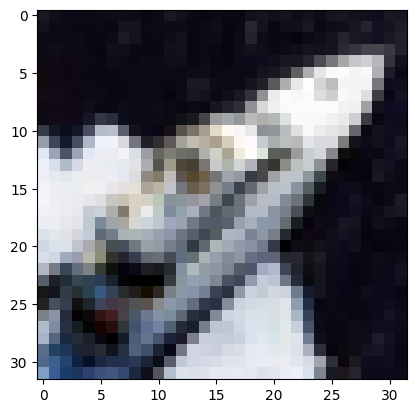

In [13]:
# Normalize the dataset (mean and std set to 0.5 - you can pick up an arbitrary value)
# Often, we dealing with images you may need to resize them and convert to PyTorch tensors
norm_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                     ])

cifar_dataset = torchvision.datasets.CIFAR10(root='datasets/',
                                           train=True,
                                           transform=norm_transform,
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='datasets/',
                                          train=False,
                                          transform=norm_transform)

cifar_dataset.classes
cifar_dataset.data
cifar_dataset.data[1234].shape
plt.imshow(cifar_dataset.data[20000])
cifar_dataset.targets[12345]

In [16]:
# Prepare the training and validation splits
# Note: num_training [49000]○ and num_validation [1000] have been defined above
mask = list(range(num_training))
len(mask)
train_dataset = torch.utils.data.Subset(cifar_dataset, mask)

mask = list(range(num_training, num_training + num_validation))
val_dataset = torch.utils.data.Subset(cifar_dataset, mask)



# Data loader allows us to select batch size and re-shuffle the data
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

# Important: train loader adapts to the batch size: 49000/200
len(train_loader)

val_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                         batch_size=batch_size,
                                         shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

#%% *** Fully connected NN with one hidden layer ***

In [21]:
# We define a class through the nn.Modulue that allows us to configure the architecture of the net

class myCoolNN(nn.Module):
    
    def __init__(self, input_size, hidden_layers, num_classes):  
        super(myCoolNN, self).__init__()        
    
        # Initialize a list of empty layers 
        layers = []
    
        # Specify first layers
        layers.append(nn.Linear(input_size, hidden_layers[0]))
        layers.append(nn.ReLU())
        
        # Add potentially add new hidden layers [-1 since we have already defined the first layer]
        for i in range(1,len(hidden_layers)-1):
            layers.append(nn.Linear(hidden_layers[i-1],hidden_layers[i]))
            layers.append(nn.ReLU())
       
        layers.append(nn.Linear(hidden_layers[len(hidden_layers)-1], num_classes))

        # Enter the layers into nn.Sequential, so the model may stack them
        # Note the use of * in front of layers
        self.layers = nn.Sequential(*layers) 
        
    def forward(self, x):
        
        # Implement the forward pass computations                                 
        # Note that you do not need to use the softmax operation at the end.            
        # Softmax is only required for the loss computation and the criterion used below
        # nn.CrossEntropyLoss() already integrates the softmax and the log loss together
      
        x=x.view(-1,input_size)  
        out=self.layers(x)
        
        return out


model = myCoolNN(input_size, hidden_size, num_classes).to(device)

In [24]:
if train:

    model.train() 

    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=reg)

    # Train the model
    lr = learning_rate
    total_step = len(train_loader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            
            # Move tensors to the configured device
            images = images.to(device)
            labels = labels.to(device)
           
            # Quick remind:                                              
            # 1. Pass the images to the model                                               
            # 2. Compute the loss using the output and the labels                          
            # 3. Compute gradients and update the model using the optimizer                 
            
            predicted=model(images) 
            loss = criterion(predicted,labels) 
            optimizer.zero_grad() 
            loss.backward() 
            optimizer.step() 

            # Print training process
            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                       .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

        # Update the learning rate
        lr *= learning_rate_decay
        update_lr(optimizer, lr)
        
        # Test the accuracy on the validation set (no gradient since it's just a test)
        with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in val_loader:
                images = images.to(device)
                labels = labels.to(device)

                # Note:
                # 1. Pass the images to the model                  
                # 2. Get the most confident predicted class        

                output_mod = model(images)
                predicted = torch.max(output_mod,1)[1]  
                # Returns a namedtuple (values, indices) where values is the maximum value of each row of the tensor (i.e. the highest predicted probability) 
                # And indices is the index location of each maximum value found (argmax)
            
                total += labels.size(0)  # += append labels each round of the loop
                correct += (predicted == labels).sum().item()

            print('Validation accuracy is: {} %'.format(100 * correct / total))

    # Save the model checkpoint
    torch.save(model.state_dict(), 'model.ckpt')

else:

    best_model = None
    best_model = torch.load('model.ckpt')
    
    model.load_state_dict(best_model)
    
    # Test the model accuracy
    model.eval()
    
    # In test phase, we don't need to compute gradients (for memory efficiency)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            images = images.view(images.size(0),-1)
            output_mod = model(images)
            predicted = torch.max(output_mod,1)[1]

            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            if total == 1000:
                break

        print('Accuracy of the network on the {} test images: {} %'.format(total, 100 * correct / total))



# Manually check what's going on...
predicted

print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

model.state_dict(), 'model.ckpt'

Epoch [1/10], Step [100/245], Loss: 1.6313
Epoch [1/10], Step [200/245], Loss: 1.6334
Validation accuracy is: 44.7 %
Epoch [2/10], Step [100/245], Loss: 1.6196
Epoch [2/10], Step [200/245], Loss: 1.4383
Validation accuracy is: 45.9 %
Epoch [3/10], Step [100/245], Loss: 1.5328
Epoch [3/10], Step [200/245], Loss: 1.5886
Validation accuracy is: 47.9 %
Epoch [4/10], Step [100/245], Loss: 1.3793
Epoch [4/10], Step [200/245], Loss: 1.4869
Validation accuracy is: 49.2 %
Epoch [5/10], Step [100/245], Loss: 1.4410
Epoch [5/10], Step [200/245], Loss: 1.5795
Validation accuracy is: 48.5 %
Epoch [6/10], Step [100/245], Loss: 1.3005
Epoch [6/10], Step [200/245], Loss: 1.4963
Validation accuracy is: 49.6 %
Epoch [7/10], Step [100/245], Loss: 1.4595
Epoch [7/10], Step [200/245], Loss: 1.4174
Validation accuracy is: 49.3 %
Epoch [8/10], Step [100/245], Loss: 1.2144
Epoch [8/10], Step [200/245], Loss: 1.2702
Validation accuracy is: 49.5 %
Epoch [9/10], Step [100/245], Loss: 1.2975
Epoch [9/10], Step [2

(OrderedDict([('layers.0.weight',
               tensor([[ 0.0118,  0.0210,  0.0224,  ...,  0.0277,  0.0169,  0.0053],
                       [-0.0095,  0.0286,  0.0212,  ..., -0.0278, -0.0391, -0.0600],
                       [ 0.0294, -0.0080, -0.0008,  ...,  0.0058,  0.0187,  0.0447],
                       ...,
                       [-0.0039, -0.0296, -0.0431,  ...,  0.0327,  0.0250,  0.0306],
                       [ 0.0445,  0.0299,  0.0167,  ...,  0.0580,  0.0460,  0.0541],
                       [-0.0060, -0.0234, -0.0136,  ..., -0.0116, -0.0076,  0.0104]])),
              ('layers.0.bias',
               tensor([-0.1135,  0.4701, -0.0757,  0.1465,  0.1185,  0.0896,  0.4976,  0.1450,
                        0.2606,  0.1710, -0.2146, -0.2452, -0.0313, -0.1316,  0.0868,  0.1735,
                       -0.0524, -0.1100,  0.3077, -0.1281, -0.1137, -0.0823, -0.2501, -0.0105,
                        0.4768,  0.0544,  0.4107, -0.1806,  0.2564, -0.2290,  0.0446, -0.2985,
             

 #######################################################################################
    # PLAY ALONE                                                                          
    #
    # Now that you can train a simple two-layer NN using above code, you can easily experiment with adding more layers and different layer configurations        
    #
    #                                                                                     
    # Experiment with different number of layers (at least from 2 to 5 layers) and record the final validation accuracies. Report your observations on how adding more layers to the NN affects its behavior (i.e. speed, accuracy, etc.)             
    #
    #                                                                                     
    # You can experiment with different activation layers available in torch.nn, adding dropout layers (more on this later). Use the best model on the validation set, to evaluate the performance on the test set once and report it                 
    #
    #######################################################################################

100%|██████████| 170498071/170498071 [01:10<00:00, 2413846.73it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified

Testing Configuration: [128, 64] with Activation ReLU
Epoch 1/10, Train Accuracy: 29.15%, Test Accuracy: 39.22%
Epoch 2/10, Train Accuracy: 33.84%, Test Accuracy: 40.16%
Epoch 3/10, Train Accuracy: 35.44%, Test Accuracy: 41.97%
Epoch 4/10, Train Accuracy: 36.15%, Test Accuracy: 43.00%
Epoch 5/10, Train Accuracy: 37.21%, Test Accuracy: 43.21%
Epoch 6/10, Train Accuracy: 37.65%, Test Accuracy: 43.45%
Epoch 7/10, Train Accuracy: 38.46%, Test Accuracy: 44.65%
Epoch 8/10, Train Accuracy: 38.79%, Test Accuracy: 43.79%
Epoch 9/10, Train Accuracy: 39.13%, Test Accuracy: 45.48%
Epoch 10/10, Train Accuracy: 39.77%, Test Accuracy: 45.33%

Testing Configuration: [128, 128, 64] with Activation ReLU
Epoch 1/10, Train Accuracy: 26.09%, Test Accuracy: 37.41%
Epoch 2/10, Train Accuracy: 31.19%, Test Accuracy: 39.55%
Epoch 3/10, Train Accuracy: 33.07%, Test Accuracy: 39.82%
Epoch 4/10, Train Accuracy: 33.97%, Test 

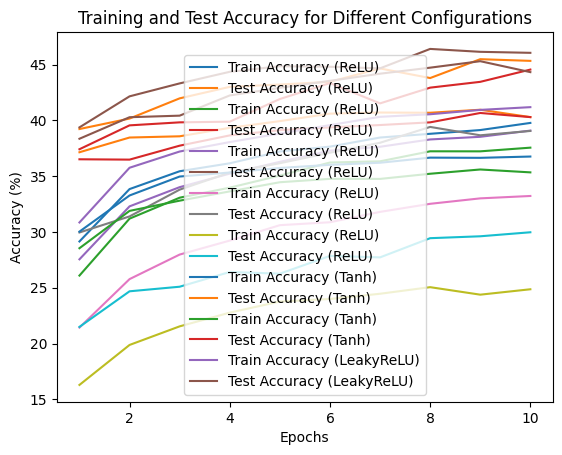

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Charger les données CIFAR-10
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

trainloader = DataLoader(trainset, batch_size=32, shuffle=True)
testloader = DataLoader(testset, batch_size=32, shuffle=False)

# Classes CIFAR-10
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Définir le modèle avec différentes couches et activations
class Net(nn.Module):
    def __init__(self, hidden_size, activation_fn):
        super(Net, self).__init__()
        self.hidden_size = hidden_size
        self.activation_fn = activation_fn
        
        layers = []
        in_features = 3 * 32 * 32  # Taille de l'entrée (3 canaux, 32x32 image)
        
        # Ajouter des couches cachées
        for size in hidden_size:
            layers.append(nn.Linear(in_features, size))
            layers.append(self.activation_fn)
            layers.append(nn.Dropout(0.5))  # Dropout avec p=0.5 pour éviter l'overfitting
            in_features = size
        
        layers.append(nn.Linear(in_features, 10))  # La sortie a 10 classes (CIFAR-10)
        self.fc_layers = nn.Sequential(*layers)
    
    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)  # Aplatir l'image en un vecteur
        return self.fc_layers(x)

# Choisir les configurations de tests
configurations = [
    {'hidden_size': [128, 64], 'activation': nn.ReLU()},
    {'hidden_size': [128, 128, 64], 'activation': nn.ReLU()},
    {'hidden_size': [256, 128, 64], 'activation': nn.ReLU()},
    {'hidden_size': [256, 128, 64, 32], 'activation': nn.ReLU()},
    {'hidden_size': [256, 128, 64, 32, 16], 'activation': nn.ReLU()},
    
    {'hidden_size': [128, 64], 'activation': nn.Tanh()},
    {'hidden_size': [128, 128, 64], 'activation': nn.Tanh()},
    
    {'hidden_size': [128, 64], 'activation': nn.LeakyReLU(0.1)},
]

# Définir la fonction de perte et l'optimiseur
def train_and_evaluate(model, trainloader, testloader, num_epochs=10):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    train_loss = []
    train_accuracy = []
    test_accuracy = []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        train_loss.append(running_loss / len(trainloader))
        train_accuracy.append(100 * correct / total)
        
        # Évaluer sur le jeu de test
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in testloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        test_accuracy.append(100 * correct / total)
        print(f"Epoch {epoch+1}/{num_epochs}, Train Accuracy: {train_accuracy[-1]:.2f}%, Test Accuracy: {test_accuracy[-1]:.2f}%")
    
    return train_loss, train_accuracy, test_accuracy

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Entraînement des modèles avec différentes configurations
for config in configurations:
    print(f"\nTesting Configuration: {config['hidden_size']} with Activation {config['activation'].__class__.__name__}")
    
    # Initialiser le modèle
    model = Net(config['hidden_size'], config['activation']).to(device)
    
    # Entraîner et évaluer
    train_loss, train_accuracy, test_accuracy = train_and_evaluate(model, trainloader, testloader, num_epochs=10)
    
    # Visualisation des résultats
    plt.plot(range(1, 11), train_accuracy, label=f"Train Accuracy ({config['activation'].__class__.__name__})")
    plt.plot(range(1, 11), test_accuracy, label=f"Test Accuracy ({config['activation'].__class__.__name__})")

plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Test Accuracy for Different Configurations')
plt.legend()
plt.show()

######## Or

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Charger les données CIFAR-10
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

trainloader = DataLoader(trainset, batch_size=32, shuffle=True)
testloader = DataLoader(testset, batch_size=32, shuffle=False)

# Classes CIFAR-10
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Définir le modèle avec différentes couches et activations
class Net(nn.Module):
    def __init__(self, hidden_size, activation_fn):
        super(Net, self).__init__()
        self.hidden_size = hidden_size
        self.activation_fn = activation_fn
        
        layers = []
        in_features = 3 * 32 * 32  # Taille de l'entrée (3 canaux, 32x32 image)
        
        # Ajouter des couches cachées
        for size in hidden_size:
            layers.append(nn.Linear(in_features, size))
            layers.append(self.activation_fn)
            layers.append(nn.Dropout(0.5))  # Dropout avec p=0.5 pour éviter l'overfitting
            in_features = size
        
        layers.append(nn.Linear(in_features, 10))  # La sortie a 10 classes (CIFAR-10)
        self.fc_layers = nn.Sequential(*layers)
    
    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)  # Aplatir l'image en un vecteur
        return self.fc_layers(x)

# Configurations pour tester les réseaux de 2 à 5 couches
configurations = [
    {'hidden_size': [128], 'activation': nn.ReLU()},
    {'hidden_size': [128, 64], 'activation': nn.ReLU()},
    {'hidden_size': [128, 64, 32], 'activation': nn.ReLU()},
    {'hidden_size': [256, 128, 64, 32], 'activation': nn.ReLU()},
    {'hidden_size': [256, 128, 64, 32, 16], 'activation': nn.ReLU()},
    
    {'hidden_size': [128], 'activation': nn.Tanh()},
    {'hidden_size': [128, 64], 'activation': nn.Tanh()},
]

# Définir la fonction de perte et l'optimiseur
def train_and_evaluate(model, trainloader, testloader, num_epochs=10):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    train_loss = []
    train_accuracy = []
    val_accuracy = []
    test_accuracy = []
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        # Entraînement
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        train_loss.append(running_loss / len(trainloader))
        train_accuracy.append(100 * correct / total)
        
        # Calculer la précision de validation sur le jeu de validation
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in testloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        val_accuracy.append(100 * correct / total)
        
        print(f"Epoch {epoch+1}/{num_epochs}, Train Accuracy: {train_accuracy[-1]:.2f}%, Validation Accuracy: {val_accuracy[-1]:.2f}%")
    
    # Évaluer sur le jeu de test final
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    test_accuracy.append(100 * correct / total)
    print(f"Final Test Accuracy: {test_accuracy[-1]:.2f}%")
    
    return train_loss, train_accuracy, val_accuracy, test_accuracy

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Entraîner les modèles avec différentes configurations
results = {}

for config in configurations:
    print(f"\nTesting Configuration: {config['hidden_size']} with Activation {config['activation'].__class__.__name__}")
    
    # Initialiser le modèle
    model = Net(config['hidden_size'], config['activation']).to(device)
    
    # Entraîner et évaluer
    train_loss, train_accuracy, val_accuracy, test_accuracy = train_and_evaluate(model, trainloader, testloader, num_epochs=10)
    
    # Enregistrer les résultats pour chaque configuration
    results[str(config)] = {
        "train_accuracy": train_accuracy,
        "val_accuracy": val_accuracy,
        "test_accuracy": test_accuracy,
    }

# Visualisation des résultats
plt.figure(figsize=(10,6))

for config_str, result in results.items():
    plt.plot(range(1, 11), result["train_accuracy"], label=f"Train Accuracy {config_str}")
    plt.plot(range(1, 11), result["val_accuracy"], label=f"Validation Accuracy {config_str}")

plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy for Different Configurations')
plt.legend(loc='lower right')
plt.show()